## basics libraries

In [1]:
import numpy as np
import pandas as pd

## visualize libraries 

In [2]:
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

## Evalution library 

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

## Deep learning library 

In [4]:
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier

In [5]:
#DIGIT DATASET LOAD FROM (MNIST)
#x and y train ,test both are input and output 
# mnist.load_data() can't help to change data value from dataset
(X_train_digit, y_train_digit), (X_test_digit, y_test_digit) = mnist.load_data()

In [6]:
# no changes input show the matrix form
X_train_digit

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
#now list [1] change the value
X_train_digit[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [8]:
#total 0 to 9 unit
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
# unit in words 0 to 9
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

## Visualizing the digits

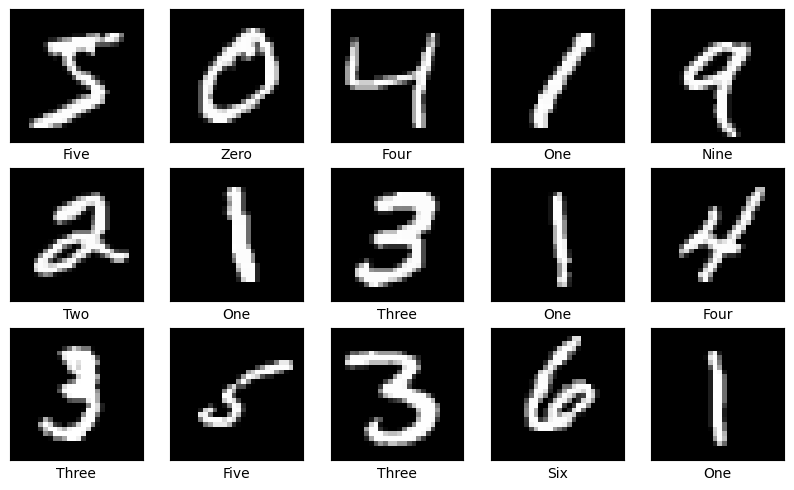

In [10]:
# create the picture and picsize (10,10)
plt.figure(figsize=(10,10))
# so using range see image 15
for i in range(15):
    #position 5*5(i+1)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    # Assuming X_train_digit is a numpy array with shape (num_samples, height, width)
    # Index of the image you want to display
    plt.imshow(X_train_digit[i], cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()

## keras model

In [11]:
#shape how many rows and columns 
X_train_digit.shape

(60000, 28, 28)

In [12]:
#(60000,28,28) Ann is 3D so we convert into 2D 

In [13]:
#28*28=784
X_train_digit = X_train_digit.reshape(60000, 784)
X_test_digit = X_test_digit.reshape(10000, 784)

In [14]:
X_train_digit.shape

(60000, 784)

In [15]:
# test-output can be 1D means change using one hot encoding
## example 1st and 2nd image is 2 and 7 using one hot encoding like this {[0,1,2,3,4,5,6,7,8,9][0,0,1,0,0,0,0,1,0,0] position of the imgae show(0,1)
y_test_digit.shape

(10000,)

In [16]:
#Encoding Digit MNIST Labels or categorical class 10
y_train_digit = to_categorical(y_train_digit, num_classes=10)

In [17]:
y_test_digit = to_categorical(y_test_digit, num_classes=10)

In [18]:
# output categorical class=10(0,1)
y_test_digit

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
## input categorical class=10(0,1)
y_train_digit[1]-0 replace 1 means there is no image 

SyntaxError: invalid syntax (4036385741.py, line 2)

## ANN-output-one hot encoding 
## input=2D
## output=1D-one hot encoding

In [20]:
## [model creation-brain active]-procedure 

## what type of processes?
## sequence -ANN
## INPUT > WEIGHT >HIDEEN >SUMMATION> ACTIVATION FUNCTION >OUTPUT 

## Creating base neural network
## Dense > all neuron in connection(layer>input.dense>1st hidden)
## activation='relu'summation(max(0,m)-256_neuron -hyper tuning parameters 

In [21]:
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(10,activation='sigmoid'),
])

C:\Users\ragus\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## dense1=256+1*64=16,448
## dense2=65*64=4,160
## dense=65*10=650

In [22]:
#param_number = output_channel_number * (input_channel_number + 1)
model.summary()# shown over all calculation

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,218 (868.04 KB)

 Trainable params: 222,218 (868.04 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
## brain
## compliling
## fit

In [24]:
#Compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

### [fit method]-model creat(brain create)
## batch_size=100 [learing process history=model.fit]
## epochs=10-[60000-processes(feed and back propagation)]
## validation_data(learn than take test)

In [25]:
history=model.fit(X_train_digit, y_train_digit, batch_size=100, epochs=10,validation_data=(X_test_digit, y_test_digit))

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7651 - loss: 3.8577 - val_accuracy: 0.9141 - val_loss: 0.3509
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9234 - loss: 0.2899 - val_accuracy: 0.9379 - val_loss: 0.2314
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9491 - loss: 0.1834 - val_accuracy: 0.9488 - val_loss: 0.2002
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9579 - loss: 0.1464 - val_accuracy: 0.9485 - val_loss: 0.2039
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9642 - loss: 0.1230 - val_accuracy: 0.9584 - val_loss: 0.1635
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9705 - loss: 0.1016 - val_accuracy: 0.9639 - val_loss: 0.1492
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9723 - loss: 0.0934 - val_accuracy: 0.9590 - val_loss: 0.1635
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9747 - loss: 0.0895 - val_acc

In [26]:
test_loss_digit, test_acc_digit = model.evaluate(X_test_digit, y_test_digit)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9638 - loss: 0.1560


In [27]:
print('Digit MNIST Test accuracy:', round(test_acc_digit,4))

Digit MNIST Test accuracy: 0.9689


## Predicting the labels-DIGIT

In [28]:
y_predict = model.predict(X_test_digit)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [29]:
y_predict[0]

array([0.89264387, 0.99995446, 0.38712546, 0.99999744, 0.9960305 ,
       0.9697081 , 0.00629903, 1.        , 0.3860341 , 0.96680516],
      dtype=float32)

In [30]:
y_predicts=np.argmax(y_predict, axis=1)
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

In [31]:
y_predicts[0]

7

In [32]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [33]:
y_pre=pd.DataFrame(y_predicts)

In [34]:
y_pre

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


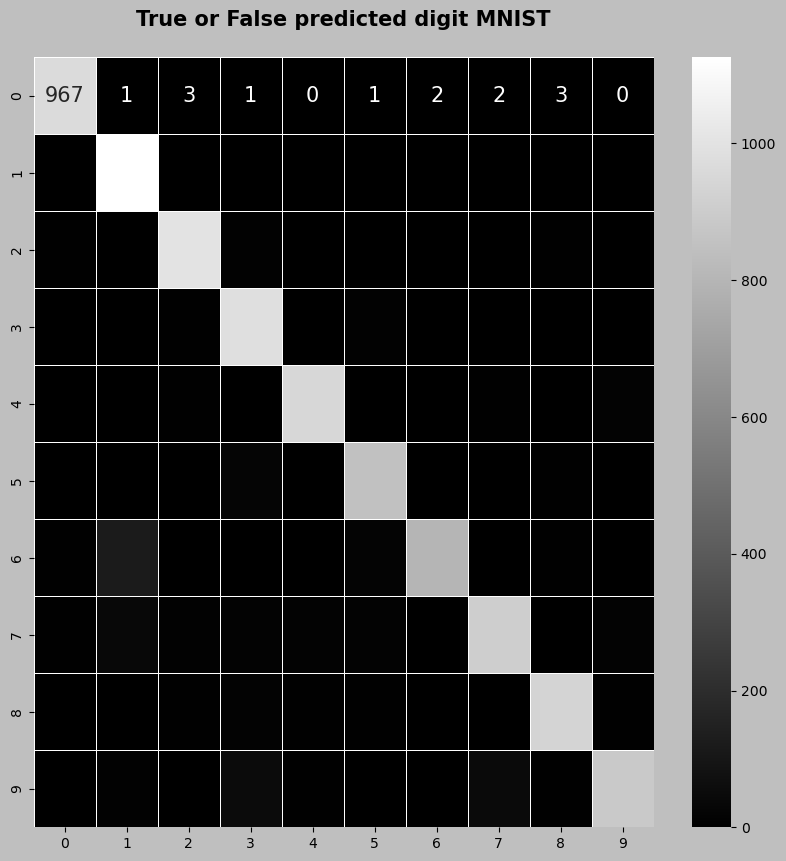

In [35]:
#Confusion matrix for Digit MNIST
con_mat=confusion_matrix(y_test_digit_eval,y_predicts)
plt.style.use("grayscale")
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.87      0.99      0.92      1135
           2       0.96      0.97      0.97      1032
           3       0.89      0.98      0.93      1010
           4       0.97      0.97      0.97       982
           5       0.94      0.95      0.95       892
           6       0.99      0.83      0.90       958
           7       0.93      0.88      0.91      1028
           8       0.96      0.96      0.96       974
           9       0.95      0.88      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



In [37]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


# summarize history for accuracy

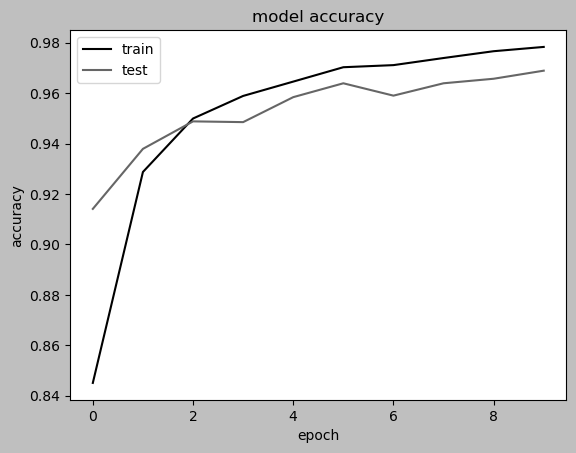

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss

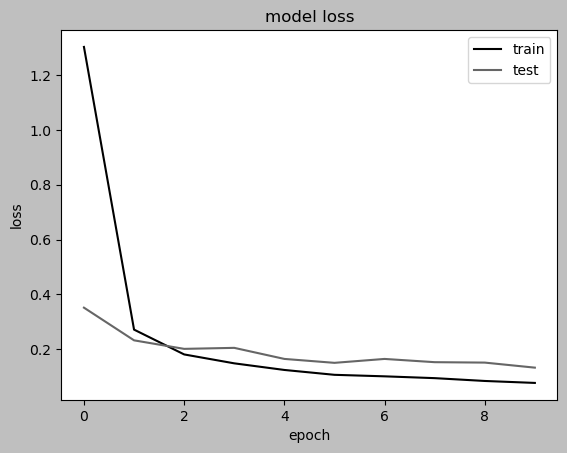

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

## Predicting and Evaluating a Single Digit MNIST Instance
## 1. Predicting a Single Instance

In [40]:
#tf.expand_dims(X_test_digit[0])
y_predict_single = model.predict(X_test_digit[[5]])
y_predicts_single=np.argmax(y_predict_single, axis=1)
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [41]:
y_predicts_single[0]

1

In [42]:
y_predicts_single

array([1], dtype=int64)

In [43]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

## #Visualizing the digits
# plt.figure(figsize=(10,10))

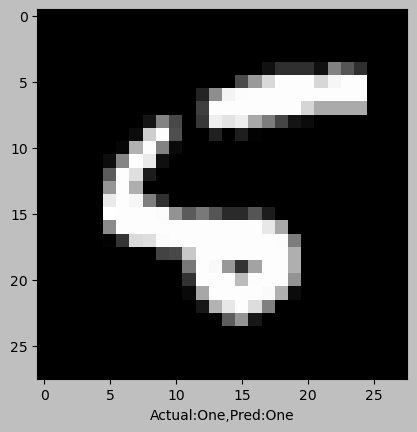

In [44]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']
plt.imshow(X_test_digit[8].reshape(28,28), cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_digit[2])],col_names[y_predicts_single[0]]))
plt.show()

In [45]:
y_test_digit[8]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])